In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from bs4 import BeautifulSoup
import dateutil.parser
import pickle
import unicodedata
from datetime import datetime

###Load and Clean data

In [17]:
movieFrame = pd.read_csv('/users/markregalla/desktop/metis/ds5/challenges/02-pandas/2013_movies.csv',
                        parse_dates=True)
movieFrame = movieFrame.dropna()

In [18]:
movieFrame['ReleaseDate'] = movieFrame['ReleaseDate'] \
.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
movieFrame.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating', u'Runtime', u'ReleaseDate'], dtype='object')

#Challenge 1
Plot domestic total gross over time.

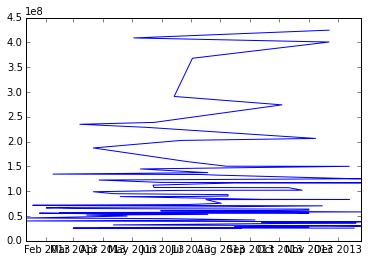

In [12]:
%matplotlib inline
plt.plot(movieFrame['ReleaseDate'], movieFrame['DomesticTotalGross'])

#Challenge 2
Plot runtime vs. domestic total gross.

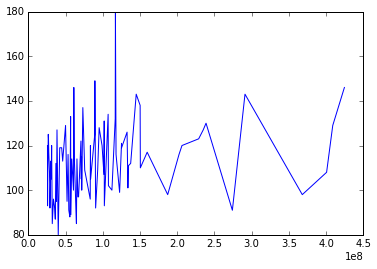

In [8]:
%matplotlib inline
plt.plot(movieFrame['DomesticTotalGross'], movieFrame['Runtime'])

#Challenge 3
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [5]:
ratingList = []
for i in movieFrame['Rating'].unique():
    ratingList.append(i)

    i = 0
for i in ratingList:
    print 'Averages for movies Rated ' + i + ':'
    print movieFrame[movieFrame['Rating'] == i].mean()
    print ''

Averages for movies Rated PG-13:
Budget                9.877500e+07
DomesticTotalGross    1.177266e+08
Runtime               1.173500e+02
dtype: float64

Averages for movies Rated PG:
Budget                9.507143e+07
DomesticTotalGross    1.319459e+08
Runtime               1.002857e+02
dtype: float64

Averages for movies Rated R:
Budget                38863636.363636
DomesticTotalGross    74227948.787879
Runtime                    111.939394
dtype: float64



#Challenge 4
Make one figure with (N=the number of MPAA ratings there are) subplots, 
and in each plot the release date vs the domestic total gross.

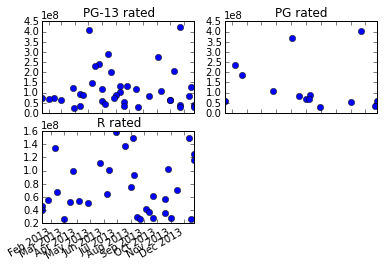

In [66]:
rating_array = movieFrame['Rating'].unique()
type(rating_array)
k = 1
for i in rating_array:
    plt.subplot(2, 2, k)
    rating_df = movieFrame[movieFrame.Rating == i]
    plt.title(str(i)+ ' rated')
    plt.plot_date(rating_df.ReleaseDate, rating_df.DomesticTotalGross)
    plt.gcf().autofmt_xdate() # tilt the xlabels
    k += 1
plt.show()

#Challenge 5
What director in your dataset has the highest gross per movie?

In [72]:
dirSum = movieFrame.groupby('Director').mean()
dirSum = dirSum.sort(['DomesticTotalGross'], ascending=False)
print 'Director ' + str(dirSum.head(1)) + ' had the highest gross per movie.'

Director                      Budget  DomesticTotalGross  Runtime
Director                                                
Francis Lawrence  130000000           424668047      146 had the highest gross per movie.


#Challenge 6
Bin your dataset into years (if applicable) and make a bar graph with error bars of gross each year.

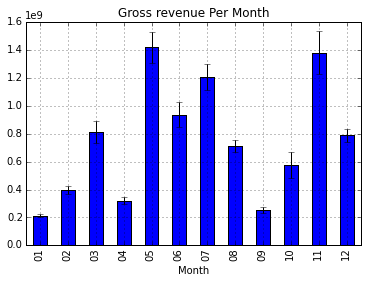

In [42]:
movieFrame['Month'] = [datetime.strftime(x, '%m') for x in movieFrame['ReleaseDate']]

month_sum = movieFrame.groupby('Month').sum()
month_std = movieFrame.groupby('Month').std()

y = month_sum['DomesticTotalGross']
errors = month_std['DomesticTotalGross']

y.plot(yerr=errors, kind='bar', title='Gross revenue Per Month')
plt.show()